In [1]:
# Import libraries
# Your code here

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Read csv file and take a look at it
train = pd.read_csv('TRAIN.csv') # Your code here
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [3]:
# Taking a look at how many rows and columns the train dataset contains
rows = train.shape[0] # Your code here
columns = train.shape[1] # Your code here
print("The train dataset contains {} rows and {} columns".format(rows, columns))

The train dataset contains 499120 rows and 59 columns


## 1. Data Quality Checks

### Null or missing values check
Let check whether there are any null values in the train dataset as follows:

In [4]:
# Your code here
train.isnull().any().any()

False

**Note:** Our null values check returns False but however, this does not really mean that this case has been closed as the data is also described as *"Values of -1 indicate that the feature was missing from the observation"*. Therefore I take it that Porto Seguro has simply conducted a blanket replacement of all null values in the data with the value of -1. Let us now inspect if there where any missing values in the data.

Here we can see that which columns contained -1 in their values so we could easily for example make a blanket replacement of all -1 with nulls first as follows:

In [5]:
train_copy = train.copy()
train_copy = train_copy.replace(-1, np.NaN)

We can use "Missingno" to visualize missing values in the dataset.

<AxesSubplot:>

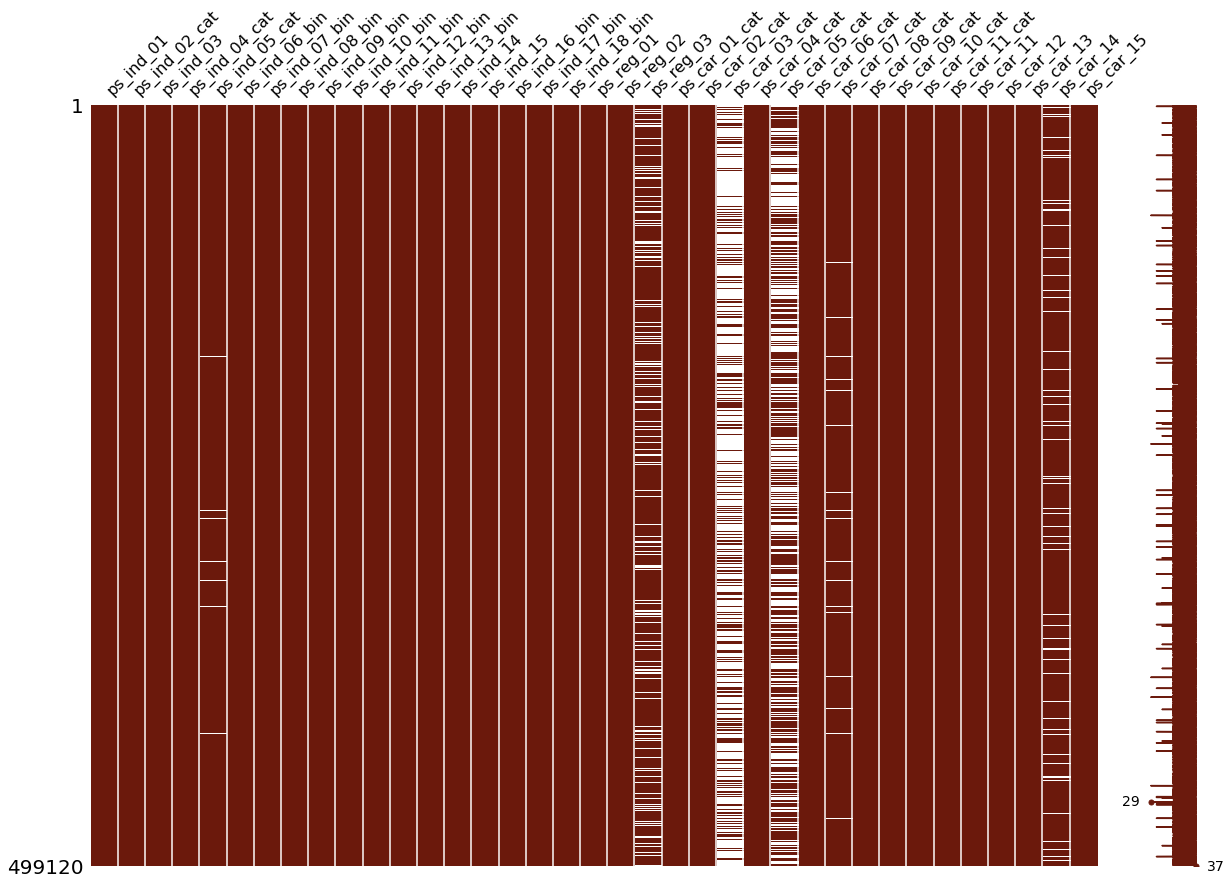

In [6]:
# If you don't have "Missingno" package, use this command to install
# conda install -c conda-forge missingno
import missingno as msno

msno.matrix(df=train_copy.iloc[:, 2:39], figsize=(20, 14), color=(0.42, 0.1, 0.05))

In [7]:
# List null columns name
# Hint: isnull()
# Your code here
train_copy.isnull().sum()

id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        185
ps_ind_03              0
ps_ind_04_cat         71
ps_ind_05_cat       4890
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03          90466
ps_car_01_cat         92
ps_car_02_cat          4
ps_car_03_cat     345221
ps_car_04_cat          0
ps_car_05_cat     223678
ps_car_06_cat          0
ps_car_07_cat       9653
ps_car_08_cat          0
ps_car_09_cat        469
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              4
ps_car_12              1
ps_car_13              0
ps_car_14          35713
ps_car_15              0
ps_calc_01             0


#### Target variable inspection

<AxesSubplot:xlabel='target', ylabel='count'>

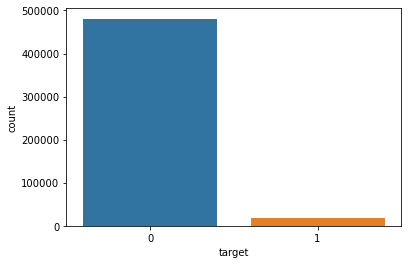

In [8]:
# Using countplot to represent target
# Your code here
sns.countplot(x='target', data=train)

## 2. Feature inspection and filtering

### Correlation plots
As a starter, let us generate some linear correlation plots just to have a quick look at how a feature is linearly correlated to the next and perhaps start gaining some insights from here. At this juncture, I will use the seaborn statistical visualisation package to plot a heatmap of the correlation values. Conveniently, Pandas dataframes come with the corr() method inbuilt, which calculates the Pearson correlation. Also as convenient is Seaborn's way of invoking a correlation plot. Just literally the word "heatmap"

#### Correlation of float features

In [9]:
train_float = train.select_dtypes(include=['float64'])
train_int = train.select_dtypes(include=['int64'])

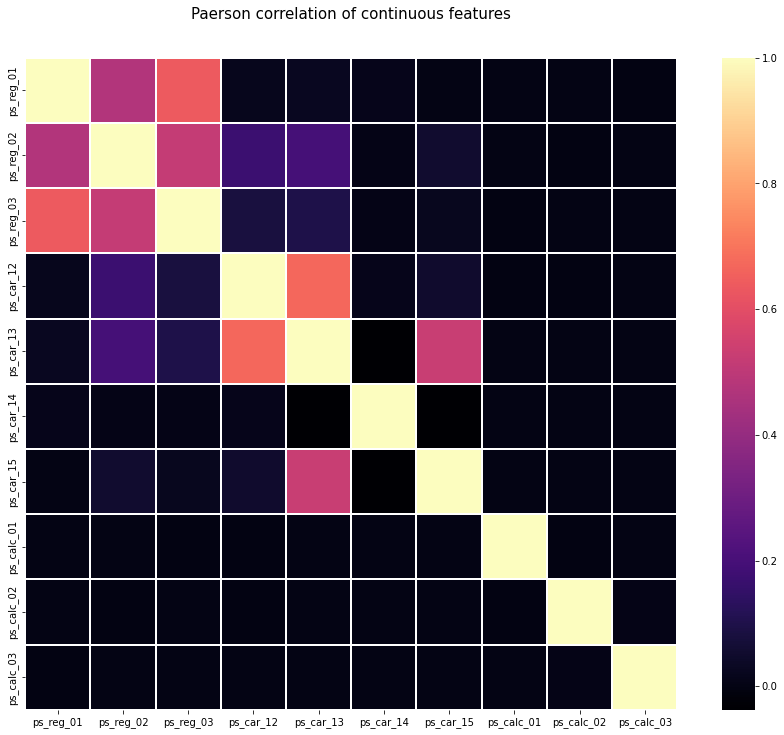

In [10]:
colormap = plt.cm.magma
plt.figure(figsize=(16, 12))
plt.title("Paerson correlation of continuous features", y=1.05, size=15)
sns.heatmap(train_float.corr(), linewidths=0.1, vmax=1.0, square=True,
           cmap=colormap)
plt.show()

From the correlation plot, we can see that the majority of the features display zero or no correlation to one another. This is quite an interesting observation that will warrant our further investigation later down. For now, the paired features that display a positive linear correlation are listed as follows:

(ps_reg_01, ps_reg_03)

(ps_reg_02, ps_reg_03)

(ps_car_12, ps_car_13)

(ps_car_13, ps_car_15)

### Correlation of integer features

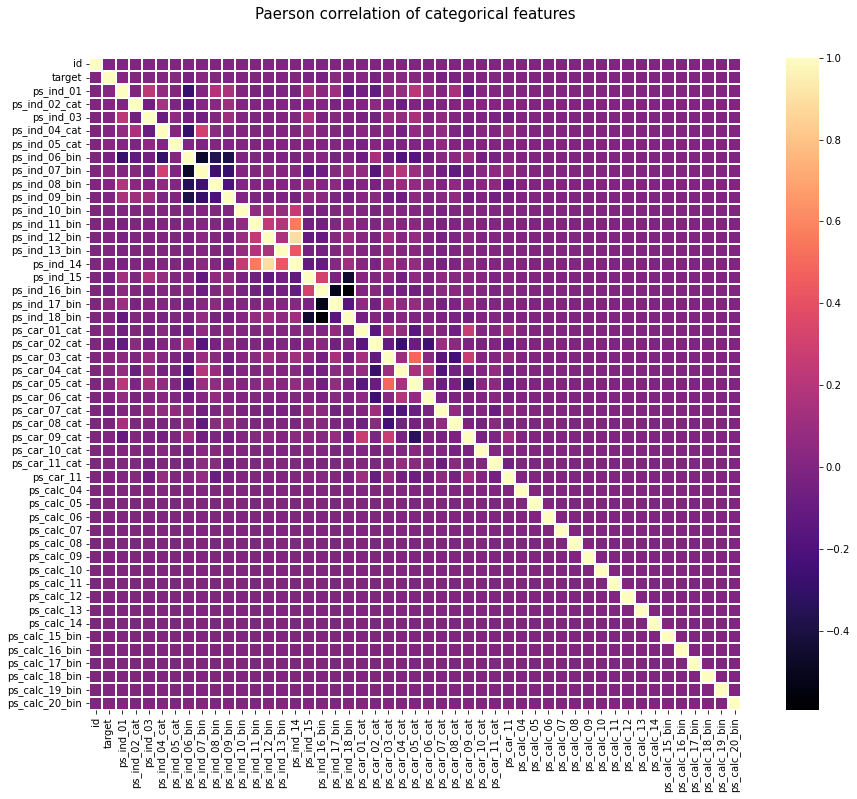

In [11]:
# Your code here
# Hint: correlation of train_int
colormap = plt.cm.magma
plt.figure(figsize=(16, 12))
plt.title("Paerson correlation of categorical features", y=1.05, size=15)
sns.heatmap(train_int.corr(), linewidths=0.1, vmax=1.0, square=True,
           cmap=colormap)
plt.show()
plt.show()

#### Which features have negatively correlation?
Negatively correlated features :

- (ps_ind_05_bin, ps_ind_06_bin)
- (ps_ind_08_bin, ps_ind_06_bin)
- (ps_ind_09_bin, ps_ind_06_bin)
- (ps_ind_17_bin, ps_ind_16_bin)
- (ps_ind_18_bin, ps_ind_16_bin)
- (ps_ind_18_bin, ps_ind_15_bin)

### Binary features inspection
Another aspect of the data that we may want to inspect would be the coulmns that only contain binary values, i.e where values take on only either of the two values 1 or 0. Proceeding, we store all columns that contain these binary values and then generate a vertical plotly bar plot of these binary values as follows:

In [12]:
bin_col = list(filter(lambda x: '_bin' in x, train.columns))
bin_value_counts = train[bin_col].apply(pd.value_counts)

In [13]:
bin_value_counts

,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,ps_ind_11_bin,ps_ind_12_bin,ps_ind_13_bin,ps_ind_16_bin,ps_ind_17_bin,ps_ind_18_bin,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,302625,370927,417321,406487,498937,498280,494400,498657,169114,438623,422624,437850,185774,222360,355759,324886,422517
1,196495,128193,81799,92633,183,840,4720,463,330006,60497,76496,61270,313346,276760,143361,174234,76603


<AxesSubplot:>

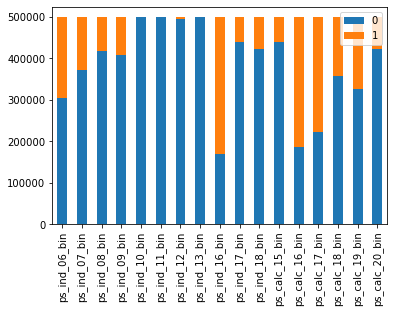

In [14]:
# hint pandas plot.bar with stacked=True
# Your code here
bin_value_counts.T.plot.bar(stacked=True)

Those columns ps_ind_10_bin, ps_ind_11_bin, ps_ind_12_bin, ps_ind_13_bin which are completely dominated by zeros. They do not contain much information.

## 3. Preprocess Data

In [15]:
# Check ratio between classes
percentage_claimed = (train['target'] == 1).sum() / train.shape[0] * 100
percentage_not_claimed = (train['target'] == 0).sum() / train.shape[0] * 100

print ('Percentage Claim: %.2f' % percentage_claimed)
print ('Percentage Non-claim: %.2f'% percentage_not_claimed)

Percentage Claim: 3.65
Percentage Non-claim: 96.35


In [16]:
# Import train_test_split 
# Your code here
from sklearn.model_selection import train_test_split

In [17]:
# Define X (features), y (target)
X = train.drop(['id', 'target'], axis=1) # Your code here
y = train['target'] # Your code here

In [18]:
# Split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=101, stratify = y) # Your code here

In [19]:
# Check null values in X_train and X_test
X_train.isnull().sum()

ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0
ps_calc_13        0


In [20]:
X_test.isnull().sum()

ps_ind_01         0
ps_ind_02_cat     0
ps_ind_03         0
ps_ind_04_cat     0
ps_ind_05_cat     0
ps_ind_06_bin     0
ps_ind_07_bin     0
ps_ind_08_bin     0
ps_ind_09_bin     0
ps_ind_10_bin     0
ps_ind_11_bin     0
ps_ind_12_bin     0
ps_ind_13_bin     0
ps_ind_14         0
ps_ind_15         0
ps_ind_16_bin     0
ps_ind_17_bin     0
ps_ind_18_bin     0
ps_reg_01         0
ps_reg_02         0
ps_reg_03         0
ps_car_01_cat     0
ps_car_02_cat     0
ps_car_03_cat     0
ps_car_04_cat     0
ps_car_05_cat     0
ps_car_06_cat     0
ps_car_07_cat     0
ps_car_08_cat     0
ps_car_09_cat     0
ps_car_10_cat     0
ps_car_11_cat     0
ps_car_11         0
ps_car_12         0
ps_car_13         0
ps_car_14         0
ps_car_15         0
ps_calc_01        0
ps_calc_02        0
ps_calc_03        0
ps_calc_04        0
ps_calc_05        0
ps_calc_06        0
ps_calc_07        0
ps_calc_08        0
ps_calc_09        0
ps_calc_10        0
ps_calc_11        0
ps_calc_12        0
ps_calc_13        0


In [21]:
# Fill null values in X_train and X_Test with value of -1
X_train_new = X_train.fillna(-1)
X_test_new = X_test.fillna(-1)

In [22]:
# Check the values of training data by the class of target column 
training_data = pd.concat ([X_train,y_train],axis = 1)
training_data['target'].value_counts()

0    144269
1      5467
Name: target, dtype: int64

#### Randomly Under-Sampling the Training Dataset¶
**Note:** Validate ratio between 2 class after Under-Sampling

Percentage of records not making claims:  0.5
Percentage of records making claims:  0.5
Total number of records in resampled data:  10934


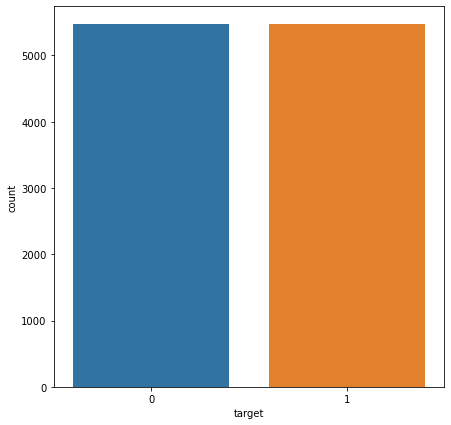

In [23]:
# claim/non-claim data
# Select row which "Class" is 1 and save in claim_data
claim_data = training_data[training_data['target'] == 1]

# Select row which "Class" is 0 and save in non_claim_data
non_claim_data = training_data[training_data['target'] == 0]

# Number of fraud, non-fraud transactions
number_records_claim = claim_data.shape[0]
number_records_non_claim = non_claim_data.shape[0]

# Using sample function on data frame to randomly select number_records_fraud from non_fraud_data data frame
under_sample_non_claim = non_claim_data.sample(number_records_claim)

# **concat** under_sample_non_claim and claim_data to form under_sample_data
under_sample_data = pd.concat([under_sample_non_claim, claim_data], axis=0)

# Showing ratio
print("Percentage of records not making claims: ", under_sample_non_claim.shape[0] / under_sample_data.shape[0])
print("Percentage of records making claims: ", claim_data.shape[0] / under_sample_data.shape[0])
print("Total number of records in resampled data: ", under_sample_data.shape[0])

# Assigning X,y for Under-sampled Data
X_train_undersample = under_sample_data.drop(columns=['target'])
y_train_undersample = under_sample_data['target']

X_train_undersample = X_train_undersample.fillna(-1)

# Plot countplot
plt.figure(figsize=(7,7))
# Make a count plot to show ratio between 2 class on "Class" column
sns.countplot(data=under_sample_data, x='target')
plt.show()

#### Randomly Over-Sampling the Training Dataset
**Note:** Validate ratio between 2 class after Over-Sampling

Percentage of records not making claim:  0.5
Percentage of records making claim:  0.018947244383755345
Total number of records in resampled data:  288538


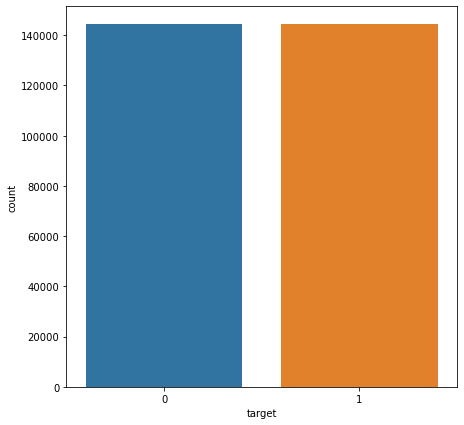

In [24]:
# Using sample on claim_data with replacement "replace = True",  since we take a larger sample than population
over_sample_claim = claim_data.sample(replace = True, n=number_records_non_claim)

# **concat** over_sample_fraud and non_fraud_data to form under_sample_data
over_sample_data = pd.concat([over_sample_claim, non_claim_data], axis=0)

# Showing ratio
print("Percentage of records not making claim: ", non_claim_data.shape[0]/over_sample_data.shape[0])
print("Percentage of records making claim: ", claim_data.shape[0]/over_sample_data.shape[0])
print("Total number of records in resampled data: ", over_sample_data.shape[0])

# Assigning X, y for over-sampled dataset
X_train_oversample = over_sample_data.drop(columns=['target'])
y_train_oversample = over_sample_data['target']

X_train_oversample = X_train_oversample.fillna(-1)

# Plot countplot
plt.figure(figsize=(7,7))
# Make a count plot to show ratio between 2 class on "Class" column
sns.countplot(data=over_sample_data, x='target')
plt.show()

## 4. Modeling

In [25]:
# Spot check with LogisticRegression, DecisionTreeClassifier, RandomForestClassifier, BernoulliNB, GaussianNB
# Import libraries and and create model

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB

# Your code here

lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
bnb = BernoulliNB()
gnb = GaussianNB()
svm = LinearSVC()

models = [lr, dtc, rfc, gnb, bnb]
models_name = ["Logistic Regression", "Decision Tree", "Random Forest", "Bernoulli NB", "Gaussian NB"]

## 5. Evaluation Metrics

In [26]:
# Import confusion_matrix, classification_report
# Your code here

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import recall_score, precision_score, roc_auc_score, roc_curve, make_scorer
score_fun = make_scorer('roc_auc')

# We create an utils function, that take a trained model as argument and print out confusion matrix
# classification report base on X and y
def evaluate_model(estimator, X, y, description):
    # Making predictions from X values
    prediction = estimator.predict(X)
    
    # Set print options 
    np.set_printoptions(precision=2)
    model_name = type(estimator).__name__
    
    return {'name': model_name, 
            'recall': recall_score(y, prediction),
            'precision': precision_score(y, prediction),
            'auc': roc_auc_score(y, prediction),
            'description': description}

### Evaluate with Origin dataset

In [27]:
scores_origin = []

for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    
    # Fit your model with Origin dataset 
    model.fit(X_train_new, y_train)
    
    # Evaluate model with X_test, y_test
    scores_origin.append(evaluate_model(model, X_test_new, y_test, 'origin'))
    print("=======================================")

Model: Logistic Regression


C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: Decision Tree
Model: Random Forest
Model: Bernoulli NB
Model: Gaussian NB


### Evaluate with *Undersampled* dataset

In [28]:
scores_under = []
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    # Your code here
    # Fit your model with Oversampled dataset
    model.fit(X_train_undersample, y_train_undersample)
    # Evaluate model with X_test, y_test
    scores_under.append(evaluate_model(model, X_test_new, y_test, 'under'))
    print("=======================================")

Model: Logistic Regression


C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Decision Tree
Model: Random Forest
Model: Bernoulli NB
Model: Gaussian NB


### Evaluate with *Oversampled* dataset

In [29]:
scores_over = []
for idx, model in enumerate(models):
    print("Model: {}".format(models_name[idx]))
    # Your code here
    # Fit your model with Oversampled dataset
    model.fit(X_train_oversample, y_train_oversample)
    # Evaluate model with X_test, y_test
    scores_under.append(evaluate_model(model, X_test_new, y_test, 'over'))
    print("=======================================")

Model: Logistic Regression


C:\Users\Suma Marri\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Model: Decision Tree
Model: Random Forest
Model: Bernoulli NB
Model: Gaussian NB


### Conclusion

Which model has lowest/highest accuracy?
Which model has lowest/highest recall?
Which model has lowest/highest f1?

In [30]:
df_under = pd.DataFrame(scores_under)
df_over  = pd.DataFrame(scores_over)
df_origin = pd.DataFrame(scores_origin)

df_all = pd.concat([df_under, df_over, df_origin])

**Recall vs resample methods**

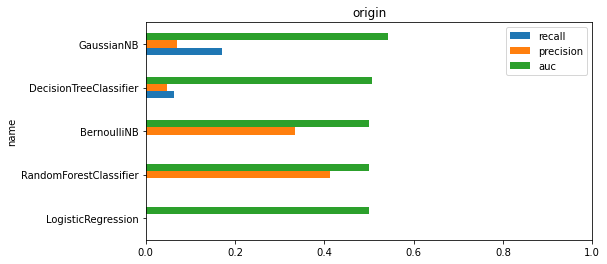

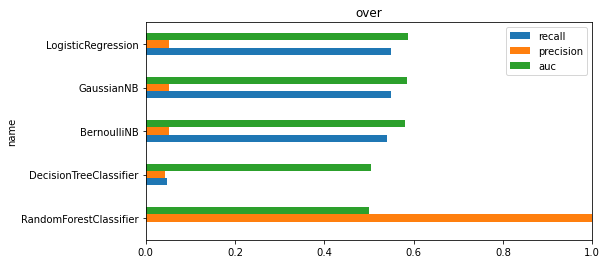

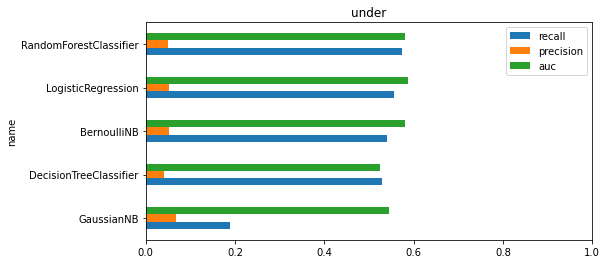

In [31]:
df_all.sort_values(['recall'], inplace=True)
for label, df in df_all.groupby('description'):
    df.plot(x='name', kind='barh', title=label, figsize=(8, 4), xlim=(0, 1))

**Recall vs Algrothims**

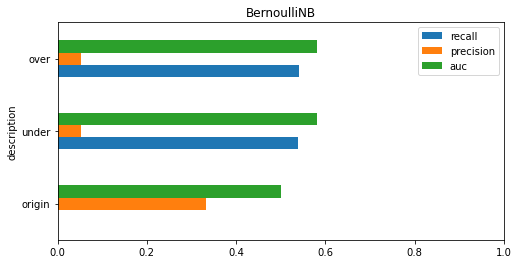

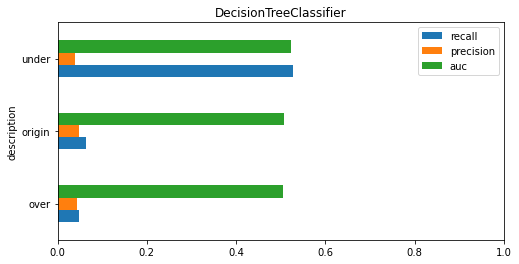

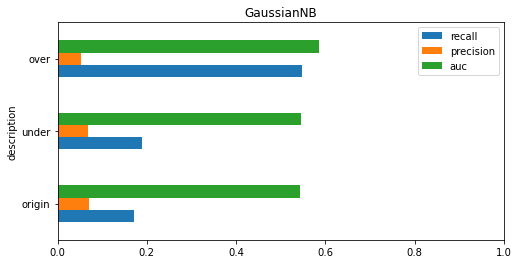

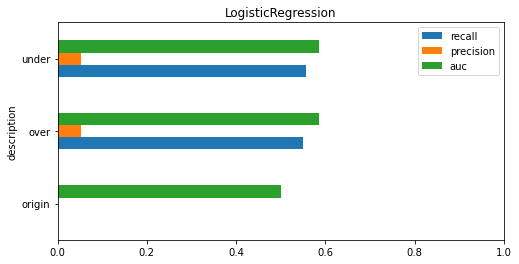

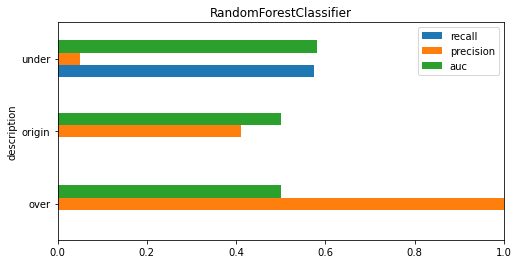

In [32]:
df_all.sort_values('recall', inplace=True)
for label, df in df_all.groupby('name'):
    df.plot(x='description', kind='barh', title=label, figsize=(8, 4), xlim=(0,1))

In [33]:
df_all['f1'] = 2 * (df_all['recall'] * df_all['precision']) / (df_all['recall'] + df_all['precision'])

In [34]:
df_all.sort_values(by='auc')

,name,recall,precision,auc,description,f1
0,LogisticRegression,0.000000,0.000000,0.500000,origin,NaN
7,RandomForestClassifier,0.000078,1.000000,0.500039,over,0.000157
2,RandomForestClassifier,0.000549,0.411765,0.500259,origin,0.001096
4,BernoulliNB,0.001489,0.333333,0.500688,origin,0.002965
6,DecisionTreeClassifier,0.047892,0.043762,0.504115,over,0.045734
1,DecisionTreeClassifier,0.063725,0.046907,0.507326,origin,0.054038
1,DecisionTreeClassifier,0.528374,0.039999,0.523877,under,0.074368
3,GaussianNB,0.171500,0.069324,0.542120,origin,0.098736
3,GaussianNB,0.188196,0.067731,0.545011,under,0.099612
2,RandomForestClassifier,0.574306,0.050133,0.580954,under,0.092216


**Conclusion**

- Logistic Regression model has the highest accuracy, while the accuracy of Gaussian NB model is the lowest. 

- Logistic Regression model has the highest recall, while the recall of Gaussian NB model is the lowest.

- Highest f1: 
    - Original dataset: Random Forest 
    - Under sample dataset: Decision Tree 
    - Over sample dataset: Random Forest
- Lowest f1: 
    - Original dataset: Logistic Regression 
    - Under sample dataset: Gaussian NB
    - Over sample dataset: Gaussian NB

## 6. GridsearchCV

#### which is the best combination of parameter